<a href="https://colab.research.google.com/github/ungvietanh20172394/COF-Tank/blob/main/COF_tank_fluid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import math
import random
import numpy as np
import time
import pandas as pd

In [3]:
_C1 = 31623.0
_C10 = 9.744
_C11 = 0.145
_C12 = 1.8
_C13 = 6.29
_C14 = 1.0
_C15 = 4.685
_C16 = 30.89
_C17 = 0.001481
_C18 = 0.005
_C19 = 1.085
_C2 = 1000.0
_C20 = 1.013
_C21 = 5328.0
_C22 = 5.8
_C23 = 0.45
_C24 = 2.6
_C25 = 0.0296 
_C26 = 100.0 
_C27 = 1.0 
_C28 = 1000.0 
_C29 = 0.0004303 
_C3 = 4536.0 
_C30 = 9.76E-08 
_C31 = 864.0
_C32 = 0.543
_C33 = 0.0815
_C34 = 86.4 
_C35 = 2.382
_C36 = 30.5
_C37 = 1.408E-08
_C38 = 1.1341
_C39 = 3.9365
_C4 = 2.205 
_C40 = 5.9352 
_C5 = 25.2 
_C6 = 55.6 
_C7 = 1.0 
_C8 = 0.0929
_C9 = 0.123

In [4]:
obj = [0.00072, 0, 0, 0.000002, 0.00072, 5000, 0, 0, 120000, 5, 0, 0, 50]
class CA_TANK_BOTTOM:
    def __init__(self, Soil_type, TANK_FLUID, Swg, TANK_DIAMETER, FLUID_HEIGHT, PREVENTION_BARRIER, EnvironSensitivity, MATERIAL_COST, PRODUCTION_COST, P_lvdike,P_onsite,P_offsite,Concrete_Asphalt):
        self.Soil_type = Soil_type
        self.TANK_FLUID = TANK_FLUID
        self.Swg = Swg
        self.TANK_DIAMETER = TANK_DIAMETER
        self.FLUID_HEIGHT = FLUID_HEIGHT
        # self.API_COMPONENT_TYPE_NAME = API_COMPONENT_TYPE_NAME
        self.PREVENTION_BARRIER = PREVENTION_BARRIER
        self.EnvironSensitivity =EnvironSensitivity
        self.MATERIAL_COST = MATERIAL_COST
        self.PRODUCTION_COST = PRODUCTION_COST
        self.P_lvdike = P_lvdike
        self.P_onsite = P_onsite
        self.P_offsite = P_offsite
        self.Concrete_Asphalt = Concrete_Asphalt

    def FC_Category(self, fc):
        if (fc <= 10000):
            return "A"
        elif (fc <= 100000):
            return "B"
        elif (fc <= 1000000):
            return "C"
        elif (fc <= 10000000):
            return "D"
        else:
            return "E"

    def n_rh(self, i):
        if (i==4):
            return 1
        else:
            C36 = _C36
            return max(pow(self.TANK_DIAMETER / C36, 2), 1)

    def k_h_bottom(self):
        k_h = [0, 0, 0]
        if (self.Soil_type == "Coarse Sand"):
            k_h[0] = 0.1
            k_h[1] = 0.01
            k_h[2] = 0.33
        elif(self.Soil_type == "Fine Sand"):
            k_h[0] = 0.01
            k_h[1] = 0.001
            k_h[2] = 0.33
        elif(self.Soil_type == "Very Fine Sand"):
            k_h[0] = pow(10, -3)
            k_h[1] = pow(10, -5)
            k_h[2] = 0.33
        elif(self.Soil_type == "Silt"):
            k_h[0] = pow(10, -5)
            k_h[1] = pow(10, -6)
            k_h[2] = 0.41
        elif(self.Soil_type == "Sandy Clay"):
            k_h[0] = pow(10, -6)
            k_h[1] = pow(10, -7)
            k_h[2] = 0.45
        elif(self.Soil_type == "Clay"):
            k_h[0] = pow(10, -7)
            k_h[1] = pow(10, -8)
            k_h[2] = 0.5
        elif(self.Soil_type == "Concrete-Asphalt"):
            k_h[0] = pow(10, -10)
            k_h[1] = pow(10, -11)
            k_h[2] = 0.3
        else:
            k_h[0] = 1
            k_h[1] = 0.1
            k_h[2] = 0.4
        return k_h

    def k_h_water(self):
        C31 = _C31
        k_h = self.k_h_bottom()
        return C31 * (k_h[0] + k_h[1]) / 2

    def dn_bottom(self, i):
        if (i == 1):
            if (self.PREVENTION_BARRIER):
                dn = 3.175
            else:
                dn = 12.7
        elif (i == 4):
            dn = 250 * self.TANK_DIAMETER
        else:
            dn = 0
        return dn

    def rate_n_tank_bottom(self, i):
        try:
            C33 = _C33
            C34 = _C34
            C35 = _C35
            C37 = _C37
            C38 = _C38
            C39 = _C39
            C40 = _C40
            if (self.PREVENTION_BARRIER):
                ps= pow(self.dn_bottom(i),1.8)/(0.21*pow(0.0762,0.4))
                if (self.k_h_prod() > C34 * pow(self.dn_bottom(i), 2)):
                    return C33 * math.pi * self.dn_bottom(i) * math.sqrt(2 * 1 * 0.0762) * self.n_rh(i)
                elif (self.k_h_prod() <= C37 * pow(ps,(1 / 0.74))):
                    return C35 * 0.21 * pow(self.dn_bottom(i), 0.2) * pow(0.0762, 0.9) * pow(self.k_h_prod(),0.74) * self.n_rh(i)
                else:
                    m = C40 - 0.4324 * math.log10(self.dn_bottom(i)) + 0.5405 * math.log10(0.0762)
                    return C38 * pow(10,2 * math.log10(self.dn_bottom(i)) + 0.5 * math.log10(0.0762) - 0.74 * pow((C39 * 2 * math.log10(self.dn_bottom(i)) - math.log10(self.k_h_prod())) / m, m))
            else:
                ps = pow(self.dn_bottom(i), 1.8) / (0.21 * pow(self.FLUID_HEIGHT, 0.4))
                if (self.k_h_prod() > C34 * pow(self.dn_bottom(i), 2)):
                    return C33 * math.pi * self.dn_bottom(i) * math.sqrt(2 * 1 * self.FLUID_HEIGHT) * self.n_rh(i)
                elif (self.k_h_prod() <= C37*pow(ps,(1/0.74))):
                    return C35 * 0.21 * pow(self.dn_bottom(i), 0.2) * pow(self.FLUID_HEIGHT, 0.9) * pow(self.k_h_prod(), 0.74) * self.n_rh(i)
                else:
                    m = C40-0.4324*math.log10(self.dn_bottom(i)) + 0.5405*math.log10(self.FLUID_HEIGHT)
                    return C38*pow(10,2*math.log10(self.dn_bottom(i))+0.5*math.log10(self.FLUID_HEIGHT)-0.74*pow((C39 * 2*math.log10(self.dn_bottom(i))-math.log10(self.k_h_prod()))/m,m))
        except Exception as e:
            print("Error rate_n_tank_bottom:", e)

    def t_ld_tank_bottom(self):
        if (self.Concrete_Asphalt):
            return 7
        elif (self.PREVENTION_BARRIER):
            return 30
        else:
            return 360

    def BBL_TOTAL_TANKBOTTOM(self):
        return math.pi * pow(self.TANK_DIAMETER, 2) * self.FLUID_HEIGHT / (4 * _C13)

    def ld_n_tank_bottom(self, i):
        try:
            Bbl_total_tank_bottom = (math.pi * pow(self.TANK_DIAMETER, 2) * self.FLUID_HEIGHT * _C13) / 4
            if self.rate_n_tank_bottom(i) == 0:
                return self.t_ld_tank_bottom()
            else:
                return min(float(Bbl_total_tank_bottom) / self.rate_n_tank_bottom(i), self.t_ld_tank_bottom())
        except Exception as e:
            print("Error ld_n_tank_bottom:",e)

    def Bbl_leak_n_bottom(self, i):
        Bbl_total_tank_bottom = (math.pi * pow(self.TANK_DIAMETER, 2) * self.FLUID_HEIGHT * _C13) / (4)
        return min(self.rate_n_tank_bottom(i) * self.ld_n_tank_bottom(i), Bbl_total_tank_bottom)

    def Bbl_rupture_bottom(self):
        Bbl_total_tank_bottom = (math.pi * pow(self.TANK_DIAMETER, 2) * self.FLUID_HEIGHT* _C13) / (4)
        return Bbl_total_tank_bottom

    def GET_PL_UL(self):
        data = [0, 0]
        if (self.TANK_FLUID == "Gasoline"):
            data[0] = 684.018
            data[1] = 4.01 * pow(10, -3)
        elif(self.TANK_FLUID == "Light Diesel Oil"):
            data[0] = 734.011
            data[1] = 1.04 * pow(10, -3)
        elif(self.TANK_FLUID == "Heavy Diesel Oil"):
            data[0] = 764.527
            data[1] = 2.46 * pow(10, -3)
        elif(self.TANK_FLUID == "Fuel Oil"):
            data[0] = 775.019
            data[1] = 3.69 * pow(10, -2)
        elif (self.TANK_FLUID == "Crude Oil"):
            data[0] = 775.019
            data[1] = 3.69 * pow(10, -2)
        elif (self.TANK_FLUID == "Heavy Crude Oil"):
            data[0] = 900.026
            data[1] = 4.6 * pow(10, -2)
        elif (self.TANK_FLUID == "Heavy Fuel Oil"):
            data[0] = 900.026
            data[1] = 4.6 * pow(10, -2)
        else:
            data[0] = 1000
            data[1] = 1
        return data

    def k_h_prod(self):
        pl_ul = self.GET_PL_UL()
        return self.k_h_water() * (pl_ul[0] / 1000) * (1 / pl_ul[1])

    def vel_s_prod(self):
        kh = self.k_h_bottom()
        return self.k_h_prod() / kh[2]

    def t_gl_bottom(self):
        try:
            return self.Swg / self.vel_s_prod()
        except:
            return 1

    def Bbl_leak_groundwater(self, i):
        try:
            if (self.t_gl_bottom() < self.t_ld_tank_bottom()):
                return self.Bbl_leak_n_bottom(i) * ((self.t_ld_tank_bottom() - self.t_gl_bottom()) / self.t_ld_tank_bottom())
            else:
                return 0
        except:
            return 0

    def Bbl_leak_subsoil(self, i):
        return self.Bbl_leak_n_bottom(i) - self.Bbl_leak_groundwater(i)

    def getCost(self):
        costTANK = [0, 0, 0, 0, 0, 0]
        if (self.EnvironSensitivity == "High"):
            costTANK[0] = 10
            costTANK[1] = 50
            costTANK[2] = 500
            costTANK[3] = 3000
            costTANK[4] = 10000
            costTANK[5] = 5000
        elif (self.EnvironSensitivity == "Medium"):
            costTANK[0] = 10
            costTANK[1] = 50
            costTANK[2] = 250
            costTANK[3] = 1500
            costTANK[4] = 5000
            costTANK[5] = 1500
        elif (self.EnvironSensitivity == "Low"):
            costTANK[0] = 10
            costTANK[1] = 50
            costTANK[2] = 100
            costTANK[3] = 500
            costTANK[4] = 1000
            costTANK[5] = 500
        else:
            costTANK[0] = 0
            costTANK[1] = 0
            costTANK[2] = 0
            costTANK[3] = 0
            costTANK[4] = 0
            costTANK[5] = 0
        return costTANK

    def FC_leak_environ_bottom(self):
        cost = self.getCost()
        summa = 0
        for i in range(1,4):
            summa = summa +(self.Bbl_leak_groundwater(i) * cost[4] + self.Bbl_leak_subsoil(i) * cost[3])*obj[i-1]
        if(self.TANK_FLUID == "Water"):
            return 0
        else:
            return summa/obj[4]

    def Bbl_rupture_release_bottom(self):
        Bbl_total_tank_bottom = (math.pi * pow(self.TANK_DIAMETER, 2) * self.FLUID_HEIGHT* _C13) / (4)
        return (Bbl_total_tank_bottom * obj[3]) / obj[4]

    def Bbl_rupture_indike_bottom(self):
        indike = self.Bbl_rupture_release_bottom() * (1 - self.P_lvdike / 100)
        if(indike > 0):
            return indike
        else:
            return 0

    def Bbl_rupture_ssonsite_bottom(self):
        onsite = self.P_onsite * (self.Bbl_rupture_release_bottom() - self.Bbl_rupture_indike_bottom()) / 100
        if(onsite > 0):
            return onsite
        else:
            return 0

    def Bbl_rupture_ssoffsite_bottom(self):
        offsite = self.P_offsite * (self.Bbl_rupture_release_bottom() - self.Bbl_rupture_indike_bottom() - self.Bbl_rupture_ssonsite_bottom()) / 100
        if(offsite > 0):
            return offsite
        else:
            return 0

    def Bbl_rupture_water_bottom(self):
        water = self.Bbl_rupture_release_bottom() - (self.Bbl_rupture_indike_bottom() + self.Bbl_rupture_ssonsite_bottom() + self.Bbl_rupture_ssoffsite_bottom())
        if(water > 0):
            return water
        else:
            return 0

    def FC_rupture_environ_bottom(self):
        cost = self.getCost()
        if (self.TANK_FLUID == "Water"):
            return 0
        else:
            return self.Bbl_rupture_indike_bottom() * cost[0] + self.Bbl_rupture_ssonsite_bottom() * cost[1] + self.Bbl_rupture_ssoffsite_bottom() * cost[2] + self.Bbl_rupture_water_bottom() * cost[5]

    def FC_environ_bottom(self):
        return self.FC_leak_environ_bottom() + self.FC_rupture_environ_bottom()

    def FC_cmd_bottom(self):
        summ = obj[0] * obj[5] + obj[1] * obj[6] + obj[2] * obj[7] + obj[3] * obj[8] * pow(self.TANK_DIAMETER / _C36, 2)
        return summ * self.MATERIAL_COST / obj[4]

    def FC_PROD_BOTTOM(self):
        t = obj[0] * obj[9] + obj[1] * obj[10] + obj[2] * obj[11] + obj[3] * obj[12]
        return t * self.PRODUCTION_COST / obj[4]

    def FC_total_bottom(self):
        FC_TOTAL_BOTTOM = self.FC_cmd_bottom() + self.FC_environ_bottom() + self.FC_PROD_BOTTOM()
        if FC_TOTAL_BOTTOM == 0:
            return 100000000
        else:
            return  FC_TOTAL_BOTTOM

In [60]:
height= []
lst1 = []
lst2 = []
lst3= []
a = []
for x in range(3,200,27):
  for y1 in range(0, 100, 5):
    for y2 in range(0, 100, 5):
      for y3 in range(0, 100, 5):
        rwequipment_typeofsoil = "Clay"
        rwstream_tankfluidname = "Gasoline"
        rwequipment_distancetogroundwater = 2
        rwcomponent_diameter = 2
        rwstream_fluidheight = x
        apicomponenttypename = "Tank"
        rwcomponent_releasepreventionbarrier = True
        rwequipment_environmentsensitivity   = "Low"
        rwmaterial_costfactor = 5
        rwinputca_productioncost = 1
        rwstream_fluidleavedikepercent = y1
        rwstream_fluidleavedikeremainonsitepercent = y2
        rwstream_fluidgooffsitepercent = y3
        rwcomponent_concretefoundation = False
        cacal = CA_TANK_BOTTOM(Soil_type = rwequipment_typeofsoil, TANK_FLUID=rwstream_tankfluidname, Swg=rwequipment_distancetogroundwater, TANK_DIAMETER=rwcomponent_diameter, 
                            FLUID_HEIGHT=rwstream_fluidheight,
                            PREVENTION_BARRIER=bool(rwcomponent_releasepreventionbarrier), EnvironSensitivity=rwequipment_environmentsensitivity, MATERIAL_COST=rwmaterial_costfactor,
                            PRODUCTION_COST=rwinputca_productioncost, P_lvdike=rwstream_fluidleavedikepercent, P_onsite = rwstream_fluidleavedikeremainonsitepercent,
                            P_offsite = rwstream_fluidgooffsitepercent, Concrete_Asphalt = rwcomponent_concretefoundation)
        height.append(x)
        lst1.append(y1)
        lst2.append(y2)
        lst3.append(y3)
        a.append(cacal.FC_total_bottom())

<function matplotlib.pyplot.show>

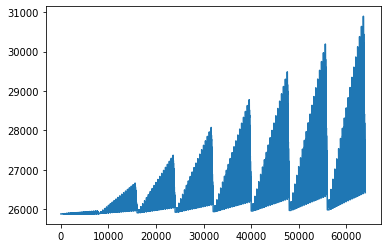

In [61]:
import matplotlib.pyplot as plt
plt.plot(a)
plt.show

In [62]:
y1max = max(lst1)
y2max = max(lst2)
y3max = max(lst3)
maxHeight = max(height)
maxResult = max(a)
print(y1max,maxResult,maxHeight)

95 30894.18575892643 192


In [63]:
rwstream_fluidleavedikepercent_arr = np.array(lst1)/100
rwstream_fluidleavedikeremainonsitepercent_arr = np.array(lst2)/100
rwstream_fluidgooffsitepercent_arr = np.array(lst3)/100
# HeightArr = np.array(height)/maxHeight
HeightArr = np.round(np.array(height)/maxHeight*100,0).astype(int)
result_arr = np.array(a)/maxResult

In [ ]:
haha = np.round(56294995342131.5, 0).astype(int)
haha.dtype
haha

56294995342132

In [64]:
cof = {'height': HeightArr,
        'rwstream_fluidleavedikepercent': rwstream_fluidleavedikepercent_arr,
        'rwstream_fluidleavedikeremainonsitepercent': rwstream_fluidleavedikeremainonsitepercent_arr,
        'rwstream_fluidgooffsitepercent': rwstream_fluidgooffsitepercent_arr,
        'cof': result_arr
        }

df = pd.DataFrame(cof, columns= ['height',
        'rwstream_fluidleavedikepercent',
        'rwstream_fluidleavedikeremainonsitepercent',
        'rwstream_fluidgooffsitepercent',
        'cof'])

# df.to_csv (r"cofTank.csv", index = False, header=True)

print (df)

       height  ...       cof
0           2  ...  0.837845
1           2  ...  0.837845
2           2  ...  0.837845
3           2  ...  0.837845
4           2  ...  0.837845
...       ...  ...       ...
63995     100  ...  0.856597
63996     100  ...  0.856273
63997     100  ...  0.855948
63998     100  ...  0.855624
63999     100  ...  0.855300

[64000 rows x 5 columns]


In [65]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [66]:
# Split the data into train and test
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)

print(df.shape, train_dataset.shape, test_dataset.shape)
train_dataset.describe().transpose()

(64000, 5) (51200, 5) (12800, 5)


,count,mean,std,min,25%,50%,75%,max
height,51200.0,50.976758,32.056608,2.000000,30.000000,58.000000,72.000000,100.00
rwstream_fluidleavedikepercent,51200.0,0.474802,0.288466,0.000000,0.200000,0.450000,0.700000,0.95
rwstream_fluidleavedikeremainonsitepercent,51200.0,0.475785,0.288599,0.000000,0.250000,0.500000,0.750000,0.95
rwstream_fluidgooffsitepercent,51200.0,0.475860,0.288080,0.000000,0.250000,0.500000,0.750000,0.95
cof,51200.0,0.853964,0.018609,0.837845,0.841203,0.847706,0.859719,1.00


In [68]:
select = 'height'
# split features from labels
train_features = train_dataset.copy()
train_features.drop(select, axis=1)
test_features = test_dataset.copy()
test_features.drop(select, axis=1)

train_labels = train_features.pop(select)
test_labels = test_features.pop(select)

In [ ]:
from keras.utils import to_categorical
num_classes = 20

y_train = to_categorical(train_labels, num_classes)
y_test = to_categorical(test_labels, num_classes)

In [ ]:
def plot(feature, x=None, y=None):
    plt.figure(figsize=(10, 8))
    plt.scatter(train_features[feature], train_labels, label='Data')
    if x is not None and y is not None:
        plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel(feature)
    plt.ylabel('cof')
    plt.legend()

In [ ]:
plot(select)

NameError: ignored

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
# multiple inputs
linear_model = tf.keras.Sequential([
    layers.Dense(units=4,activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(units=256,activation="relu"),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='relu')
])
linear_model.compile(loss='mean_absolute_error',
      optimizer='adam',
      metrics=['accuracy'])

In [ ]:
X = np.asarray(train_features).astype(np.float32)
# train_labels 
linear_model.fit(
    X, train_labels, epochs=100
    )

Epoch 1/100
8000/8000 [==============================] - 15s 2ms/step - loss: 27.5694 - accuracy: 0.0245
Epoch 2/100
8000/8000 [==============================] - 14s 2ms/step - loss: 26.2604 - accuracy: 0.0252
Epoch 3/100
8000/8000 [==============================] - 14s 2ms/step - loss: 24.0799 - accuracy: 0.0253
Epoch 4/100
8000/8000 [==============================] - 14s 2ms/step - loss: 23.4107 - accuracy: 0.0256
Epoch 5/100
8000/8000 [==============================] - 14s 2ms/step - loss: 23.1592 - accuracy: 0.0250
Epoch 6/100
8000/8000 [==============================] - 14s 2ms/step - loss: 23.1689 - accuracy: 0.0253
Epoch 7/100
8000/8000 [==============================] - 14s 2ms/step - loss: 23.0148 - accuracy: 0.0252
Epoch 8/100
8000/8000 [==============================] - 14s 2ms/step - loss: 23.0030 - accuracy: 0.0255
Epoch 9/100
8000/8000 [==============================] - 14s 2ms/step - loss: 22.9917 - accuracy: 0.0250
Epoch 10/100
2065/8000 [======>.......................]

KeyboardInterrupt: ignored

In [ ]:
y_pred_height = model.predict(X_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
# multiple inputs
model = tf.keras.Sequential([
    layers.Dense(units=4,activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(units=256,activation="relu"),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(20, activation='softmax')
])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
      optimizer='adam',
      metrics=['accuracy'])

In [ ]:
train_labels

259531    0.821429
111186    0.336735
91989     0.285714
212048    0.668367
219920    0.693878
            ...   
9707      0.030612
49150     0.158163
70041     0.209184
309485    0.974490
275027    0.872449
Name: height, Length: 256000, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, train_labels)

In [ ]:
predictlinearsklearn = reg.predict(X_test)

NameError: ignored

In [ ]:

X = np.asarray(train_features).astype(np.float32)
# train_labels 
model.fit(
    X, train_labels, epochs=100
    )
# score = model.evaluate(test_features, y_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])
# model.save("test_model.h5")

In [ ]:
y_test[2893
       ]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_test)
plt.show

NameError: ignored

In [29]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X,(train_labels*100).astype(int))

#Predict the response for test dataset
# y_pred = clf.predict(X_test)

In [ ]:
X_test = np.asarray(test_features).astype(np.float32)
y_pred = clf.predict(X_test)

In [ ]:
y_pred/100

array([ 100,  100,  100, ..., 9700, 9700, 9700], dtype=int64)

In [ ]:
[X_test[0]]


[array([0.00510204, 0.        , 0.05      , 0.83498776], dtype=float32)]

In [ ]:
y_test0= test_labels*100

In [ ]:
y_test0

1           0.510204
4           0.510204
21          0.510204
22          0.510204
27          0.510204
             ...    
319987    100.000000
319989    100.000000
319990    100.000000
319991    100.000000
319992    100.000000
Name: height, Length: 64000, dtype: float64

In [ ]:
O = np.asarray(y_test0).astype(np.float32)


In [ ]:
O

array([  0.5102041,   0.5102041,   0.5102041, ..., 100.       ,
       100.       , 100.       ], dtype=float32)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(20, 6), dpi=80)
# plt.plot(y_pred[31000:36000], 'r')
# plt.plot(y_pred_forest_regressor[20000:30000], 'g')
plt.plot(O[36000:], 'g')
plt.plot(predictlinearsklearn[36000:] * 100, 'k')
# plt.plot(y_after_load[31000:36000], 'm')
plt.show

NameError: ignored

<Figure size 1600x480 with 0 Axes>

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X,(train_labels*100).astype(int))
y_pred_forest_regressor = regressor.predict(X_test)

In [ ]:
y_pred_forest_regressor.shape

(64000,)

In [ ]:
from sklearn.externals import joblib
joblib.dump(clf, 'rwstream_fluidgooffsitepercent.pkl')

['rwstream_fluidgooffsitepercent.pkl']

In [ ]:
model = joblib.load('rwstream_fluidgooffsitepercent.pkl')
y_after_load = model.predict(X_test)

#height

<function matplotlib.pyplot.show>

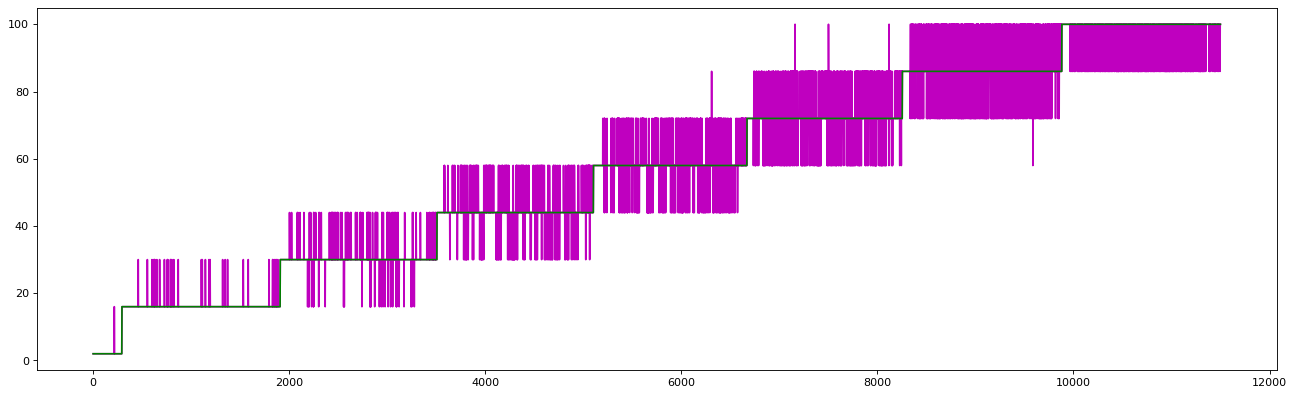

In [91]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
a = 1300
b= 21000

figure(figsize=(20, 6), dpi=80)
# plt.plot(y_pred[31000:36000], 'r')
# plt.plot(y_pred_forest_regressor[20000:30000], 'g')
# plt.plot(y_pred[a:b], 'k')
# plt.plot(y_pred_ramdom[a:b], 'r')
plt.plot(y_after_load[a:b], 'm')
plt.plot(O[a:b], 'g')


# plt.plot(y_after_load[31000:36000], 'm')
plt.show

In [72]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
X = np.asarray(train_features).astype(np.float32)
# Train Decision Tree Classifer
clf = clf.fit(X,(train_labels).astype(int))

#Predict the response for test dataset
# y_pred = clf.predict(X_test)
X_test = np.asarray(test_features).astype(np.float32)
y_pred = clf.predict(X_test)

In [74]:
X = np.asarray(train_features).astype(np.float32)
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth=100, random_state=0)
forest = forest.fit(X,(train_labels).astype(int))

#Predict the response for test dataset
# y_pred = clf.predict(X_test)
X_test = np.asarray(test_features).astype(np.float32)
y_pred_ramdom = forest.predict(X_test)

In [ ]:
y_pred.shape

(64000,)

In [ ]:
test_features.shape

(64000, 4)

In [ ]:
test_features.head()

,rwstream_fluidleavedikepercent,rwstream_fluidleavedikeremainonsitepercent,rwstream_fluidgooffsitepercent,cof
1,0.0,0.00,0.05,0.834988
4,0.0,0.00,0.20,0.834988
21,0.0,0.05,0.05,0.834988
22,0.0,0.05,0.10,0.834988
27,0.0,0.05,0.35,0.834988


In [69]:
test_labels.shape

(12800,)

In [70]:
O = np.asarray(test_labels).astype(np.float32)

In [87]:
from sklearn.externals import joblib
joblib.dump(clf, 'fludiHeightTank.pkl')

['fludiHeightTank.pkl']

In [86]:
from sklearn.externals import joblib
joblib.dump(forest, 'hihi.pkl')

['hihi.pkl']

In [88]:
model = joblib.load('fludiHeightTank.pkl')
y_after_load = model.predict(X_test)

In [98]:
m = 5321
hihi = model.predict([X_test[m]])
print(hihi)
O[m]

[44]


44.0